<hr style="border-width:4px; border-color:coral"></hr>

# Use the itikz magic commands

<hr style="border-width:4px; border-color:coral"></hr>

This example uses the `itikz` magic, which you can download from here : [itikz](https://pypi.org/project/itikz/)

In [1]:
%load_ext itikz

In this cell, we include the entire standalone commands.  

This code could also be run as a standalone file to create the image.  Save the code below to a file `mesh1d.tex` and process it using `pdflatex`: 

    $ pdflatex mesh1d.tex

The image should then be in `mesh1d.pdf`. 

<hr>

This cell uses a complete Tex file.  The code in this file (below the magic command) should compile with `pdflatex`.   

The `--temp-dir` option cleans up any temporary files created during rendering.

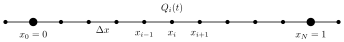

In [2]:
%%itikz --temp-dir
\documentclass{standalone}
\usepackage{tikz}
\begin{document}
\begin{tikzpicture}
\draw [thick] (-1,0) -- (11,0);
\foreach \x in {-1,...,11}{
    \fill (\x,0) circle(.075);
}
\fill (0,0) circle(.15);
\fill (10,0) circle(.15);

\node[anchor=north] at (0,-0.2) {$x_{0} = 0$};
\node[anchor=north] at (4,-0.2) {$x_{i-1}$};
\node[anchor=north] at (5,-0.2) {$x_{i}$};
\node[anchor=north] at (6,-0.2) {$x_{i+1}$};
\node[anchor=north] at (10,-0.2) {$x_N = 1$};
\node[anchor=south] at (5,0.2) {$Q_i(t)$};
\node[anchor=north] at (2.5,-0.025) {$\Delta x$};
\end{tikzpicture}
\end{document}

<hr>

In this cell, we comment out the preamble lines and use the `--implicit-pic` command to use a default preamble (probably very close to what we have commented out.   Using this approach, we can also scale the image.   

Unfortunately, though, the fonts do not seem to scale with the drawing.  

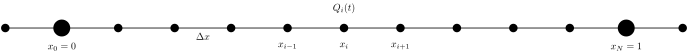

In [3]:
%%itikz --implicit-pic  --scale=2  --temp-dir

%\documentclass{standalone}
%\usepackage{tikz}
%\begin{document}
%\begin{tikzpicture}

\draw [thick] (-1,0) -- (11,0);
\foreach \x in {-1,...,11}{
    \fill (\x,0) circle(.075);
}
\fill (0,0) circle(.15);
\fill (10,0) circle(.15);

\node[anchor=north] at (0,-0.2) {$x_{0} = 0$};
\node[anchor=north] at (4,-0.2) {$x_{i-1}$};
\node[anchor=north] at (5,-0.2) {$x_{i}$};
\node[anchor=north] at (6,-0.2) {$x_{i+1}$};
\node[anchor=north] at (10,-0.2) {$x_N = 1$};
\node[anchor=south] at (5,0.2) {$Q_i(t)$};
\node[anchor=north] at (2.5,-0.025) {$\Delta x$};

%\end{tikzpicture}
%\end{document}

<hr>

The following two examples uses the [Jinja](https://palletsprojects.com/p/jinja/) templating language. 

In [4]:
node_names = "ABCDEF"
nodes = {s: int(365/len(node_names) * i) for i, s in enumerate(node_names)}
n = len(nodes)
nodes

{'A': 0, 'B': 60, 'C': 121, 'D': 182, 'E': 243, 'F': 304}

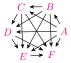

In [5]:
%%itikz --as-jinja --temp-dir
\documentclass[tikz]{standalone}
\usetikzlibrary{arrows,automata}
\definecolor{mymagenta}{RGB}{226,0,116}
\begin{document}
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=mymagenta] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}

\end{document}

<hr> 

This example is the same as the above, but the libraries and packages specified in the Latex pre-amble above are supplied via `itikz` options.

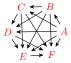

In [6]:
%%itikz --as-jinja --temp-dir --tex-packages=tikz --tikz-libraries=arrows,automata --implicit-standalone
\begin{tikzpicture}[->,>=stealth',shorten >=1pt,auto,node distance=2.8cm,
                    semithick]
  \tikzstyle{every state}=[fill=mymagenta,draw=none,text=white]
  
  {% for name, angle in nodes.items() -%}
       \node[color=red] (v{{loop.index0}}) at ({{angle}}:1) {${{name}}$};
  {% endfor -%}
  
  {% for n1 in range(n) -%}
      {% for n2 in range(n) -%}
         {%if n1 < n2 -%}
             \path (v{{n1}}) edge (v{{n2}});
         {% endif -%}
      {% endfor -%}
  {% endfor -%}

\end{tikzpicture}